In [1]:
import matplotlib.pyplot as plt

import keras_ocr

In [2]:
#recognize text via keras ocr
pipeline = keras_ocr.pipeline.Pipeline()


images = [keras_ocr.tools.read('./american-id-preprocessed.jpeg')] 
prediction_groups = pipeline.recognize(images)
print(len(prediction_groups))

for predictions in prediction_groups:
    print(predictions)

Looking for /home/victor/.keras-ocr/craft_mlt_25k.h5
Looking for /home/victor/.keras-ocr/crnn_kurapan.h5
1
[('usa', array([[835.5469  ,  57.421875],
       [884.7656  ,  57.421875],
       [884.7656  ,  78.515625],
       [835.5469  ,  78.515625]], dtype=float32)), ('driver', array([[141.53452 ,  58.942974],
       [269.45212 ,  57.48936 ],
       [269.78363 ,  86.66261 ],
       [141.86604 ,  88.11623 ]], dtype=float32)), ('license', array([[286.00082 ,  57.486374],
       [433.81534 ,  58.830143],
       [433.5499  ,  88.028725],
       [285.73538 ,  86.68495 ]], dtype=float32)), ('wisconsin', array([[516.02856 ,  57.781708],
       [886.7127  ,  63.665573],
       [885.62994 , 131.87756 ],
       [514.9458  , 125.99369 ]], dtype=float32)), ('regular', array([[183.77705,  93.40752],
       [390.1536 ,  91.7696 ],
       [390.43863, 127.68624],
       [184.06209, 129.32416]], dtype=float32)), ('d', array([[915.2344, 154.6875],
       [938.6719, 154.6875],
       [938.6719, 182.8125],


In [4]:
#read mrz code from passport
from passporteye import read_mrz
mrz = read_mrz("viza_mrz.png")
print(mrz.to_dict())

OrderedDict([('mrz_type', 'MRVB'), ('valid_score', 97), ('raw_text', 'VASESSUITERESHIEVESHYREEEEEEELEELELE4\n1234567897RUS7409185F1808096<M400630'), ('type', 'VA'), ('country', 'SES'), ('number', '123456789'), ('date_of_birth', '740918'), ('expiration_date', '180809'), ('nationality', 'RUS'), ('sex', 'F'), ('names', ''), ('surname', 'SUITERESHIEVESHYREEEEEEELEELELE'), ('optional1', '<M400630'), ('check_number', '7'), ('check_date_of_birth', '5'), ('check_expiration_date', '6'), ('valid_number', True), ('valid_date_of_birth', True), ('valid_expiration_date', True), ('method', 'black_tophat')])


In [5]:
#recognize person on photo of id
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = plt.imread('nz_passport.jpg')
classes = None
with open("coco.names.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg.txt')
net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)
class_ids = []
confidences = []
boxes = []
Width = image.shape[1]
Height = image.shape[0]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)
#check if is people detection
for i in indices:
    i = i[0]
    box = boxes[i]
    if class_ids[i]==0:
        label = str(classes[class_id]) 
        cv2.rectangle(image, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 0, 0), 2)
        cv2.putText(image, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
plt.imshow(image)

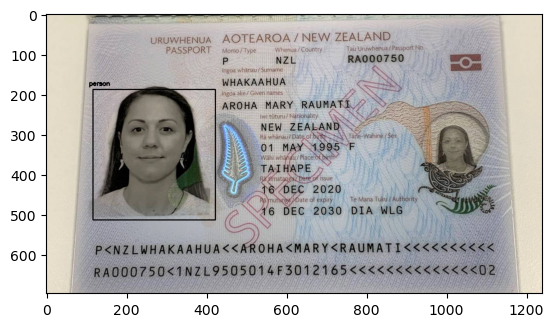

In [6]:
plt.show()

In [8]:
import zxing
reader = zxing.BarCodeReader()
print(reader.zxing_version, reader.zxing_version_info)
barcode = reader.decode("drive-license.png")
print(barcode)

3.4.1 (3, 4, 1)
BarCode(raw=' @\n\x1e\rANSI 636014040002DL00410477ZC05180089DLDAQD1234562 XYXYXYXYXYXYXYXYX\nDCSLASTNAMEXYXYXYXYXYXYXYXYXXYXYXYXYXYXYXYX\nDDEU\nDACFIRSTXYXYXYXYXYXYXYXYXXYXYXYXYXYXYXYXXYX\nDDFU\nDADXYXYXYXYXYXYXYXYXXYXYXYXYXYXYXYXXYXYXYXY\nDDGU\nDCAA XYXY\nDCBNONEY1XY1XY1\nDCDNONEX\nDBD10312009\nDBB10311977\nDBA10312014\nDBC1\nDAU068 IN\nDAYBRO\nDAG1234 ANY STREET XY1XY1XY1XY1XY1XY1X\nDAICITY XY1XY1XY1XY1XY1\nDAJCA\nDAK000000000  \nDCF00/00/0000NNNAN/ANFD/YY X\nDCGUSA\nDCUSUFIX\nDAW150\nDAZBLK XY1XY1XY\nDCKXY1XY1XY1XY1XY1XY1XY1XY1X\nDDAF\nDDBMMDDCCYY\nDDD1\n\rZCZCAY\nZCBCORR LENS\nZCCBRN\nZCDXYX\nZCEXYXYXYXYXYXYXY\nZCFXY1XY1XY1XY1XY1XY1XYXYXYXYXYXYXY\n\r', parsed=' @\n\x1e\rANSI 636014040002DL00410477ZC05180089DLDAQD1234562 XYXYXYXYXYXYXYXYX\nDCSLASTNAMEXYXYXYXYXYXYXYXYXXYXYXYXYXYXYXYX\nDDEU\nDACFIRSTXYXYXYXYXYXYXYXYXXYXYXYXYXYXYXYXXYX\nDDFU\nDADXYXYXYXYXYXYXYXYXXYXYXYXYXYXYXYXXYXYXYXY\nDDGU\nDCAA XYXY\nDCBNONEY1XY1XY1\nDCDNONEX\nDBD10312009\nDBB10311977\nDBA10312014\nD